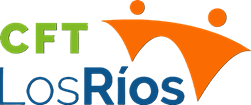
# Taller de Analítica
### Algoritmos de Clasificación
#### Profesor: Diego Miranda Olavarría
#### Data Scientist

In [1]:
import pandas as pd

data = pd.read_csv('diabetes.csv')

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
data.shape

(768, 9)

In [3]:
data.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# Distribución de clases
data['Outcome'].value_counts()

# 1 si tiene
# 0 no tiene

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
# Preparación de datos para entrenamiento
X = data.drop('Outcome', axis=1) # Variables independientes
y = data['Outcome'] # Variable dependiente

#Separar en 80% entrenamiento y 20% testear
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Importar GridSearchCV

In [6]:
from sklearn.model_selection import GridSearchCV

### Importar Metricas

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Árbol de Decisión para Clasificación

In [8]:
from sklearn.tree import DecisionTreeClassifier

# Definir el modelo base
dt = DecisionTreeClassifier(random_state=42)

# Hiperparámetros más relevantes para búsqueda
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring='accuracy',  # puedes cambiar a 'f1', 'precision', etc.
    cv=3,                # validación cruzada de 3 pliegues
    n_jobs=-1,           # usar todos los núcleos disponibles
    verbose=1
)

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_dt = grid_search.best_estimator_

Fitting 3 folds for each of 324 candidates, totalling 972 fits


In [9]:
# Predicciones
dt_pred = best_dt.predict(X_test)

# Mostrar mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

Mejores hiperparámetros encontrados:
{'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


Accuracy: 0.7922077922077922
Precision (macro): 0.7788824816066813
Recall (macro): 0.7575757575757576
F1 Score (macro): 0.7654673519893394

Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154


Matriz de confusión:
 [[87 12]
 [20 35]]


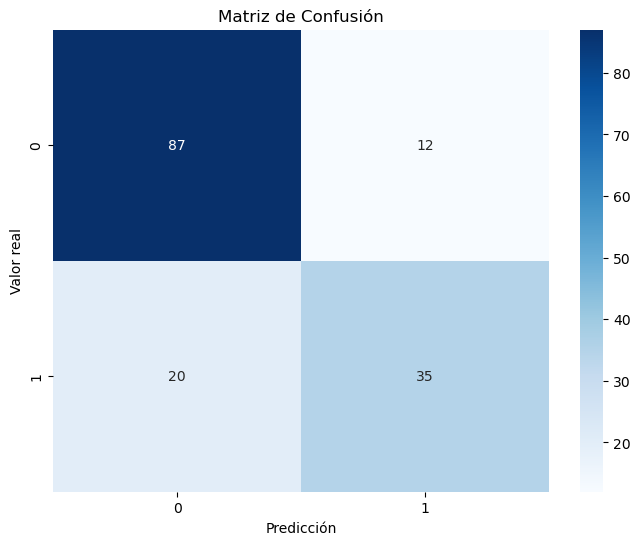

In [10]:
# 1. Predicciones
y_pred_dt = best_dt.predict(X_test)

# Métricas individuales
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision (macro):", precision_score(y_test, y_pred_dt, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_dt, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred_dt, average='macro'))

# Reporte detallado por clase
print("\nReporte de clasificación:\n")
print(classification_report(y_test, y_pred_dt))

# Matriz de confusión (números)
cm = confusion_matrix(y_test, y_pred_dt)
print("\nMatriz de confusión:\n", cm)

# Graficar la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión')
plt.show()


### Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Modelo base
rf = RandomForestClassifier(random_state=42)

# Hiperparámetros clave para una búsqueda educativa
param_grid = {
    'n_estimators': [50, 100],               # Número de árboles
    'criterion': ['gini', 'entropy'],        # Función de impureza
    'max_depth': [None, 10, 20],             # Profundidad del árbol
    'min_samples_split': [2, 5],             # Mínimos para dividir
    'min_samples_leaf': [1, 2],              # Mínimos en una hoja
    'max_features': ['sqrt', 'log2']         # Número de features por split
}

# Configurar búsqueda
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Ajuste del modelo
grid_search_rf.fit(X_train, y_train)

# Mejor modelo
best_rf = grid_search_rf.best_estimator_


Fitting 3 folds for each of 96 candidates, totalling 288 fits


In [12]:
# Predicciones
rf_pred = best_rf.predict(X_test)

# Mostrar mejores hiperparámetros
print(grid_search_rf.best_params_)

{'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


🔍 Métricas de Evaluación - Random Forest
Accuracy: 0.7532467532467533
Precision (macro): 0.7317778983541328
Recall (macro): 0.7353535353535354
F1 Score (macro): 0.7334183673469388

 Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


 Matriz de Confusión:
 [[79 20]
 [18 37]]


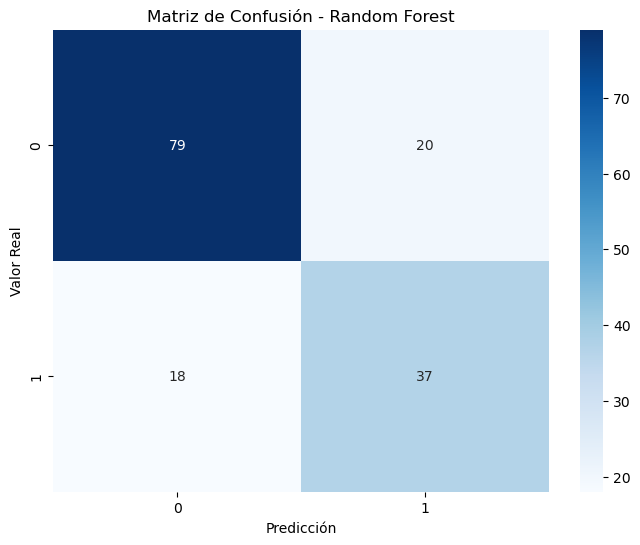

In [13]:
# 1. Predicciones con el mejor modelo de Random Forest
rf_pred = best_rf.predict(X_test)

# 2. Métricas de evaluación
print("🔍 Métricas de Evaluación - Random Forest")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Precision (macro):", precision_score(y_test, rf_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, rf_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, rf_pred, average='macro'))

# 3. Reporte detallado por clase
print("\n Reporte de clasificación:\n")
print(classification_report(y_test, rf_pred))

# 4. Matriz de confusión (texto)
cm = confusion_matrix(y_test, rf_pred)
print("\n Matriz de Confusión:\n", cm)

# 5. Gráfico de matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Random Forest')
plt.show()


### Escalado de Datos

In [14]:
from sklearn.preprocessing import StandardScaler
# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Regresión Logística

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Modelo base
lr = LogisticRegression(random_state=42, max_iter=1000)

# Grid de hiperparámetros
param_grid = {
    'penalty': ['l2', 'none'],                # tipo de regularización
    'C': [0.01, 0.1, 1, 10],                  # inverso de la fuerza de regularización
    'solver': ['lbfgs', 'saga'],             # métodos compatibles con 'l2'
    'class_weight': [None, 'balanced']
}

# GridSearchCV
grid_search_lr = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Entrenar el mejor modelo
grid_search_lr.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l2', 'none'],
                         'solver': ['lbfgs', 'saga']},
             scoring='accuracy', verbose=1)

In [16]:
# Extraer el mejor estimador
best_lr = grid_search_lr.best_estimator_

# Mostrar los mejores parámetros
print(" Mejores hiperparámetros de Regresión Logística:")
print(grid_search_lr.best_params_)

 Mejores hiperparámetros de Regresión Logística:
{'C': 0.01, 'class_weight': None, 'penalty': 'none', 'solver': 'lbfgs'}


🔍 Métricas de Evaluación - Regresión Logística
Accuracy: 0.7532467532467533
Precision (macro): 0.7317778983541328
Recall (macro): 0.7353535353535354
F1 Score (macro): 0.7334183673469388

 Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


 Matriz de Confusión:
 [[79 20]
 [18 37]]


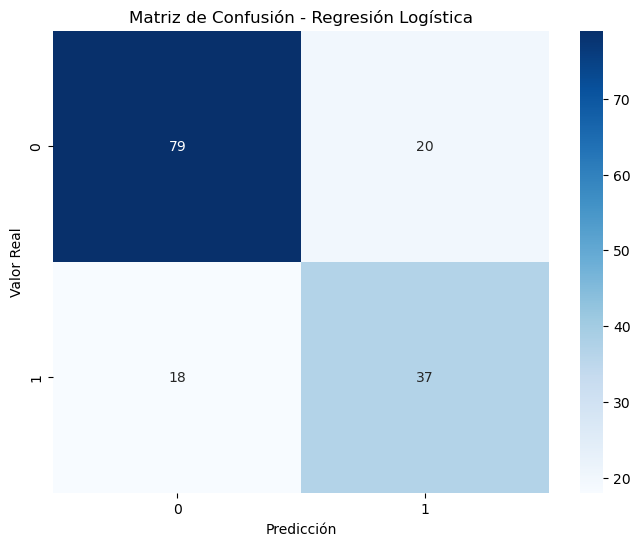

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predicciones
y_pred_lr = best_lr.predict(X_test_scaled)

# Métricas
print("🔍 Métricas de Evaluación - Regresión Logística")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision (macro):", precision_score(y_test, y_pred_lr, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_lr, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred_lr, average='macro'))

# Reporte detallado
print("\n Reporte de clasificación:\n")
print(classification_report(y_test, y_pred_lr))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_lr)
print("\n Matriz de Confusión:\n", cm)

# Gráfico
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()



### KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# Modelo base
knn = KNeighborsClassifier()

# Grid de hiperparámetros
param_grid = {
    'n_neighbors': [3, 5, 7, 9],                # Número de vecinos
    'weights': ['uniform', 'distance'],         # Peso uniforme o por distancia
    'metric': ['euclidean', 'manhattan']        # Distancia usada
}

# Configurar GridSearchCV
grid_search_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Ajustar modelo
grid_search_knn.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [19]:
# Mejor estimador
best_knn = grid_search_knn.best_estimator_

# Mostrar los mejores parámetros
print(" Mejores hiperparámetros para KNN:")
print(grid_search_knn.best_params_)

 Mejores hiperparámetros para KNN:
{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}


 Métricas de Evaluación - KNN
Accuracy: 0.6688311688311688
Precision (macro): 0.6368778280542986
Recall (macro): 0.6333333333333333
F1 Score (macro): 0.6348165713488632

 Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.74      0.76      0.75        99
           1       0.54      0.51      0.52        55

    accuracy                           0.67       154
   macro avg       0.64      0.63      0.63       154
weighted avg       0.66      0.67      0.67       154


 Matriz de Confusión:
 [[75 24]
 [27 28]]


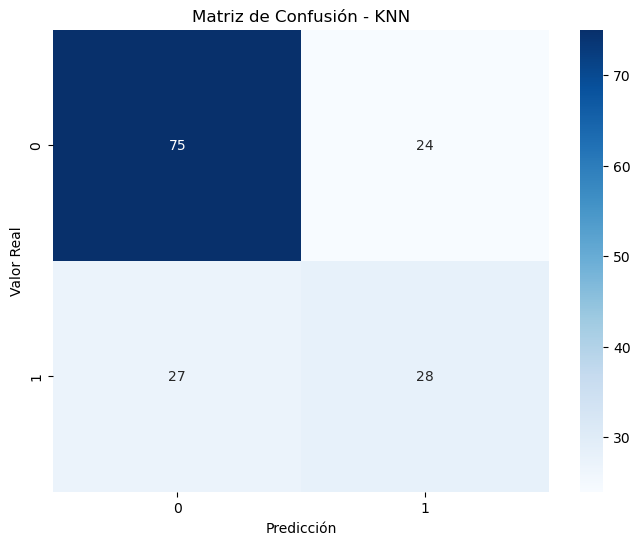

In [20]:
# Predicciones
knn_pred = best_knn.predict(X_test_scaled)

# Métricas
print(" Métricas de Evaluación - KNN")
print("Accuracy:", accuracy_score(y_test, knn_pred))
print("Precision (macro):", precision_score(y_test, knn_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, knn_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, knn_pred, average='macro'))

# Reporte
print("\n Reporte de clasificación:\n")
print(classification_report(y_test, knn_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, knn_pred)
print("\n Matriz de Confusión:\n", cm)

# Gráfico
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - KNN')
plt.show()


### Naibe Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB

# Modelo base
nb = GaussianNB()

# Grid de hiperparámetros
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

# GridSearchCV
grid_search_nb = GridSearchCV(
    estimator=nb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Ajustar modelo
grid_search_nb.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]},
             scoring='accuracy', verbose=1)

In [22]:
# Mejor estimador
best_nb = grid_search_nb.best_estimator_

# Mostrar mejores parámetros
print(" Mejor hiperparámetro para Naive Bayes:")
print(grid_search_nb.best_params_)

 Mejor hiperparámetro para Naive Bayes:
{'var_smoothing': 1e-09}


 Métricas de Evaluación - Naive Bayes
Accuracy: 0.7662337662337663
Precision (macro): 0.7462979482604817
Recall (macro): 0.7535353535353535
F1 Score (macro): 0.7493217580032556

 Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154


 Matriz de Confusión:
 [[79 20]
 [16 39]]


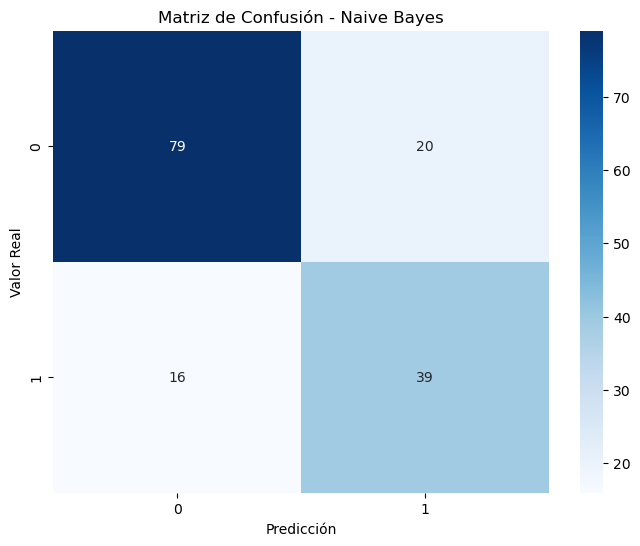

In [23]:
# Predicciones
nb_pred = best_nb.predict(X_test_scaled)

# Métricas
print(" Métricas de Evaluación - Naive Bayes")
print("Accuracy:", accuracy_score(y_test, nb_pred))
print("Precision (macro):", precision_score(y_test, nb_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, nb_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, nb_pred, average='macro'))

# Reporte
print("\n Reporte de clasificación:\n")
print(classification_report(y_test, nb_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, nb_pred)
print("\n Matriz de Confusión:\n", cm)

# Gráfico
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Naive Bayes')
plt.show()


### Support Vector Machine (SVM)

In [24]:
from sklearn.svm import SVC

# Modelo base
svm = SVC()

# Grid de hiperparámetros
param_grid = {
    'C': [0.1, 1, 10],                         # Regularización
    'kernel': ['linear', 'rbf'],              # Tipos comunes de kernel
    'gamma': ['scale', 'auto']                # Sólo aplica para 'rbf'
}

# Configurar GridSearchCV
grid_search_svm = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Ajustar modelo
grid_search_svm.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=1)

In [25]:
# Mejor estimador
best_svm = grid_search_svm.best_estimator_

# Mostrar mejores parámetros
print(" Mejores hiperparámetros para SVM:")
print(grid_search_svm.best_params_)


 Mejores hiperparámetros para SVM:
{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


 Métricas de Evaluación - SVM
Accuracy: 0.7597402597402597
Precision (macro): 0.7383333333333333
Recall (macro): 0.7363636363636363
F1 Score (macro): 0.737310405237195

 Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154


🧩 Matriz de Confusión:
 [[81 18]
 [19 36]]


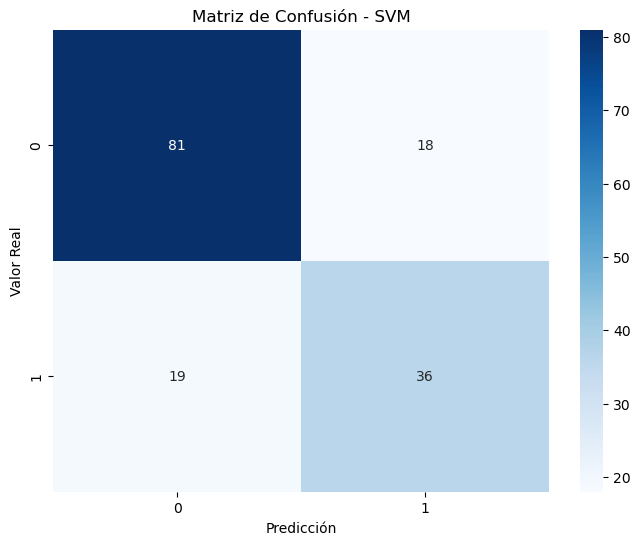

In [26]:
# Predicciones
svm_pred = best_svm.predict(X_test_scaled)

# Métricas
print(" Métricas de Evaluación - SVM")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Precision (macro):", precision_score(y_test, svm_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, svm_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, svm_pred, average='macro'))

# Reporte
print("\n Reporte de clasificación:\n")
print(classification_report(y_test, svm_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, svm_pred)
print("\n🧩 Matriz de Confusión:\n", cm)

# Gráfico
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - SVM')
plt.show()


### Multilayer Perceptron

In [27]:
from sklearn.neural_network import MLPClassifier

# Modelo base
mlp = MLPClassifier(max_iter=300, random_state=42)

# Grid de hiperparámetros
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001]
}

# Configurar GridSearchCV
grid_search_mlp = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Ajustar el modelo
grid_search_mlp.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=300, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50)],
                         'solver': ['adam', 'sgd']},
             scoring='accuracy', verbose=1)

In [28]:
# Mejor estimador
best_mlp = grid_search_mlp.best_estimator_

# Mostrar mejores parámetros
print(" Mejores hiperparámetros para MLPClassifier:")
print(grid_search_mlp.best_params_)

 Mejores hiperparámetros para MLPClassifier:
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'solver': 'adam'}


 Métricas de Evaluación - MLPClassifier
Accuracy: 0.7467532467532467
Precision (macro): 0.7252155172413793
Recall (macro): 0.7303030303030302
F1 Score (macro): 0.727433628318584

 Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154


 Matriz de Confusión:
 [[78 21]
 [18 37]]


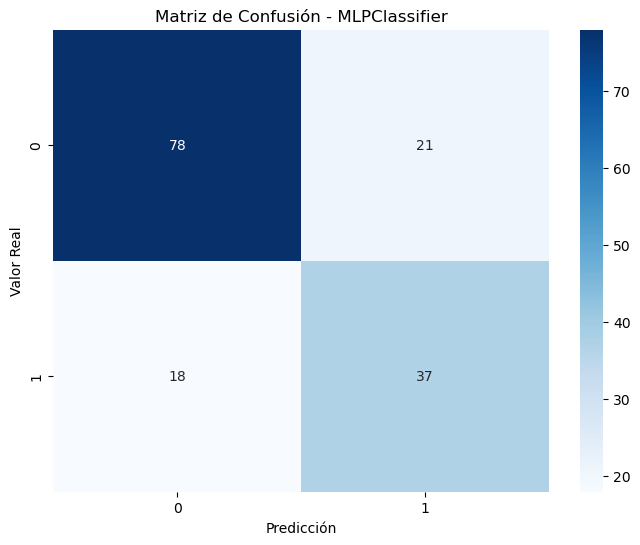

In [29]:
# Predicciones
mlp_pred = best_mlp.predict(X_test_scaled)

# Métricas
print(" Métricas de Evaluación - MLPClassifier")
print("Accuracy:", accuracy_score(y_test, mlp_pred))
print("Precision (macro):", precision_score(y_test, mlp_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, mlp_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, mlp_pred, average='macro'))

# Reporte
print("\n Reporte de clasificación:\n")
print(classification_report(y_test, mlp_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, mlp_pred)
print("\n Matriz de Confusión:\n", cm)

# Gráfico
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - MLPClassifier')
plt.show()


### XGBoost

In [30]:
from xgboost import XGBClassifier
# Se debe ocupar LabelEncoder para transformar a numéricas
from sklearn.preprocessing import LabelEncoder 

# Codificamos nuestras variables categóricas
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Modelo base
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Grid simplificada para fines educativos
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

# GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Ajustar el modelo
grid_search_xgb.fit(X_train, y_train_encoded)



Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [50, 100], 'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [31]:
# Mejor estimador
best_xgb = grid_search_xgb.best_estimator_

# Mostrar mejores parámetros
print("🔧 Mejores hiperparámetros para XGBoost:")
print(grid_search_xgb.best_params_)


🔧 Mejores hiperparámetros para XGBoost:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


🔍 Métricas de Evaluación - XGBoost
Accuracy: 0.7337662337662337
Precision (macro): 0.7125886524822695
Recall (macro): 0.7202020202020202
F1 Score (macro): 0.7155215138544717

📊 Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.81      0.77      0.79        99
           1       0.62      0.67      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154


🧩 Matriz de Confusión:
 [[76 23]
 [18 37]]


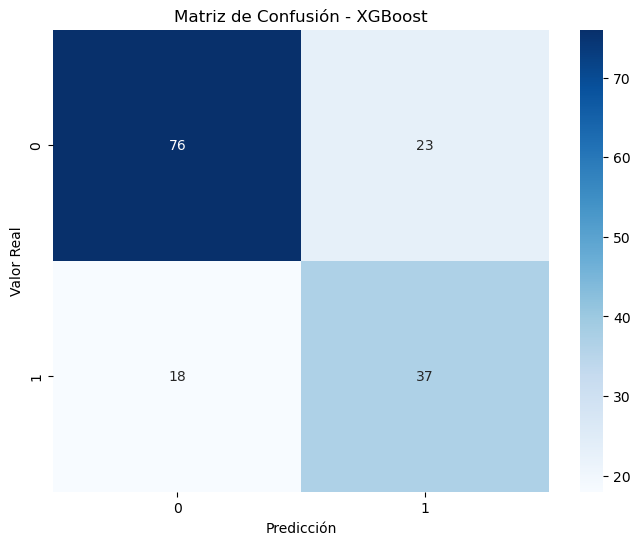

In [32]:
# Predicciones
xgb_pred = best_xgb.predict(X_test)
xgb_pred = encoder.inverse_transform(xgb_pred)

# Métricas
print("🔍 Métricas de Evaluación - XGBoost")
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("Precision (macro):", precision_score(y_test, xgb_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, xgb_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, xgb_pred, average='macro'))

# Reporte
print("\n📊 Reporte de clasificación:\n")
print(classification_report(y_test, xgb_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, xgb_pred)
print("\n🧩 Matriz de Confusión:\n", cm)

# Gráfico
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - XGBoost')
plt.show()


### Comparación de Métricas

In [33]:
from tabulate import tabulate

# Función para calcular la especificidad promedio por clase
def specificity_per_class(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    specificity_scores = []
    for i in range(len(cm)):
        tn = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
        fp = np.sum(cm[:, i]) - cm[i, i]
        specificity_scores.append(tn / (tn + fp) if (tn + fp) > 0 else 0)
    return np.mean(specificity_scores)

# Diccionario con las predicciones de cada modelo
predictions = {
    'Logistic Regression': best_lr.predict(X_test_scaled),
    'KNN': best_knn.predict(X_test_scaled),
    'Decision Tree': best_dt.predict(X_test),
    'Random Forest': best_rf.predict(X_test),
    'Naive Bayes': best_nb.predict(X_test_scaled),
    'SVM': best_svm.predict(X_test_scaled),
    'MLP': best_mlp.predict(X_test_scaled),
    'XGBoost': encoder.inverse_transform(best_xgb.predict(X_test))
}


# Calculamos las métricas para cada modelo
metrics_summary = []
for name, preds in predictions.items():
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds, average='macro')
    recall = recall_score(y_test, preds, average='macro')
    f1 = f1_score(y_test, preds, average='macro')
    specificity = specificity_per_class(y_test, preds)
    
    metrics_summary.append([
        name,
        round(accuracy, 4),
        round(precision, 4),
        round(recall, 4),
        round(specificity, 4),
        round(f1, 4)
    ])

# Mostrar tabla con tabulate
headers = ['Model', 'Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score']
print(tabulate(metrics_summary, headers=headers, tablefmt='grid'))


+---------------------+------------+-------------+----------+---------------+------------+
| Model               |   Accuracy |   Precision |   Recall |   Specificity |   F1 Score |
+=====================+============+=============+==========+===============+============+
| Logistic Regression |     0.7532 |      0.7318 |   0.7354 |        0.7354 |     0.7334 |
+---------------------+------------+-------------+----------+---------------+------------+
| KNN                 |     0.6688 |      0.6369 |   0.6333 |        0.6333 |     0.6348 |
+---------------------+------------+-------------+----------+---------------+------------+
| Decision Tree       |     0.7922 |      0.7789 |   0.7576 |        0.7576 |     0.7655 |
+---------------------+------------+-------------+----------+---------------+------------+
| Random Forest       |     0.7532 |      0.7318 |   0.7354 |        0.7354 |     0.7334 |
+---------------------+------------+-------------+----------+---------------+------------+

* Sensibilidad (Recall): La sensibilidad mide la proporción de positivos reales que se identificaron correctamente. Es una medida de la capacidad del modelo para detectar todas las instancias positivas.
* Especificidad: La especificidad mide la proporción de negativos reales que se identificaron correctamente.
* Precisión: La precisión mide la proporción de predicciones positivas que fueron correctas.
* Medida F1: La medida F1 es la media armónica de la precisión y la sensibilidad. Combina ambas en una sola métrica al considerar tanto los falsos positivos como los falsos negativos.